Analysis:
- As you get closer to the equator (0 lat), the temperature increases.
- There seems to be no corrleation between humidity and cloudiness worldwide.
- There appears to be an uptick of wind speeds as you move further from the equator, maybe do the spinning of the axis?

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

today = pd.Timestamp("today").strftime("%m/%d/%Y")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city = city.replace(' ','%20')
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


785

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information, both the url and the unit of measurements
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
city = 'honiara'
#Test to see one response and get the general json values
response = requests.get(query_url + city).json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.43, 'lon': 159.96},
 'dt': 1540054800,
 'id': 2108502,
 'main': {'humidity': 100,
          'pressure': 1009,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Honiara',
 'sys': {'country': 'SB',
         'id': 8147,
         'message': 0.0034,
         'sunrise': 1539975268,
         'sunset': 1540019724,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 3.36}}


In [5]:
#for city in cities:


# set up lists to hold reponse info
city_nm = []
lat = []
temp = []
humid = []
cloud = []
wind = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
#    print(f"Processing City Number: {query_url}{city}")
    response = requests.get(query_url + city).json()
#    print(f"{response['cod']}")
#cast response to type int
    valid = int(response['cod'])
#to check if there is a valid response for this city
    if valid == 200: 
        city_nm.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing City Number: {counter}: {response['name']}")
        counter = counter + 1


Processing City Number: 1: Puerto Ayora
Processing City Number: 2: San Patricio
Processing City Number: 3: Punta Arenas
Processing City Number: 4: Busselton
Processing City Number: 5: Ushuaia
Processing City Number: 6: Hilo
Processing City Number: 7: Bluff
Processing City Number: 8: Hami
Processing City Number: 9: Fairbanks
Processing City Number: 10: Lugovoy
Processing City Number: 11: Namibe
Processing City Number: 12: Hermanus
Processing City Number: 13: New Norfolk
Processing City Number: 14: Pacific Grove
Processing City Number: 15: Geraldton
Processing City Number: 16: Segezha
Processing City Number: 17: Mataura
Processing City Number: 18: Atuona
Processing City Number: 19: Kapaa
Processing City Number: 20: Faya
Processing City Number: 21: Dikson
Processing City Number: 22: Dingle
Processing City Number: 23: Barrow
Processing City Number: 24: Cape Town
Processing City Number: 25: Yellowknife
Processing City Number: 26: Gat
Processing City Number: 27: Cape Town
Processing City Num

Processing City Number: 217: Cape Town
Processing City Number: 218: Vardo
Processing City Number: 219: Bubaque
Processing City Number: 220: Kysyl-Syr
Processing City Number: 221: Port Alfred
Processing City Number: 222: Karratha
Processing City Number: 223: Punta Arenas
Processing City Number: 224: Cape Town
Processing City Number: 225: Saint George
Processing City Number: 226: Tanout
Processing City Number: 227: Pontes e Lacerda
Processing City Number: 228: Avarua
Processing City Number: 229: Xingtai
Processing City Number: 230: Guozhen
Processing City Number: 231: Pozo Colorado
Processing City Number: 232: Punta Arenas
Processing City Number: 233: Bodden Town
Processing City Number: 234: Horki
Processing City Number: 235: Kutum
Processing City Number: 236: Santo Antonio do Leverger
Processing City Number: 237: Port Elizabeth
Processing City Number: 238: Kabanjahe
Processing City Number: 239: Solaro
Processing City Number: 240: Mujiayingzi
Processing City Number: 241: Vaitape
Processi

Processing City Number: 425: Puerto Carreno
Processing City Number: 426: Lorengau
Processing City Number: 427: Guaruja
Processing City Number: 428: Karangasem
Processing City Number: 429: Grants Pass
Processing City Number: 430: Punta Arenas
Processing City Number: 431: Rincon
Processing City Number: 432: Lompoc
Processing City Number: 433: Bilibino
Processing City Number: 434: Okha
Processing City Number: 435: Port Alfred
Processing City Number: 436: Puerto Ayora
Processing City Number: 437: Inongo
Processing City Number: 438: Port Alfred
Processing City Number: 439: Cabo San Lucas
Processing City Number: 440: Laguna
Processing City Number: 441: Kokoda
Processing City Number: 442: Udachnyy
Processing City Number: 443: Abnub
Processing City Number: 444: Mehamn
Processing City Number: 445: Cayenne
Processing City Number: 446: Punta Arenas
Processing City Number: 447: Scarborough
Processing City Number: 448: Bossangoa
Processing City Number: 449: Alberton
Processing City Number: 450: Cac

Processing City Number: 633: Alexandria
Processing City Number: 634: Santa Lucia
Processing City Number: 635: Deputatskiy
Processing City Number: 636: Puerto Ayora
Processing City Number: 637: Okhotsk
Processing City Number: 638: Arraial do Cabo
Processing City Number: 639: Dixon
Processing City Number: 640: Vila Franca do Campo
Processing City Number: 641: Punta Arenas
Processing City Number: 642: Reconquista
Processing City Number: 643: Portadown
Processing City Number: 644: Shakawe
Processing City Number: 645: Galle
Processing City Number: 646: Punta Arenas
Processing City Number: 647: Henties Bay
Processing City Number: 648: Summerville
Processing City Number: 649: Vezirkopru
Processing City Number: 650: Bambous Virieux
Processing City Number: 651: Provins
Processing City Number: 652: Ribeira Grande
Processing City Number: 653: Vitoria do Mearim
Processing City Number: 654: Cape Town
Processing City Number: 655: Leshukonskoye
Processing City Number: 656: Greifswald
Processing City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# # create a data frame from cities, lat, and temp, humidity, cloudiness, and wind
weather_dict = {
    "city": city_nm,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
# pprint.pprint(response)

,city,lat,temp,humidity,cloudiness,wind
0,Puerto Ayora,-0.74,82.40,54,20,10.29
1,San Patricio,-26.98,82.80,66,0,4.43
2,Punta Arenas,-53.16,52.99,66,0,11.41
3,Busselton,-33.64,61.69,100,68,23.78
4,Ushuaia,-54.81,52.20,56,0,3.09


In [7]:
weather_data.to_csv(output_data_file, sep=',', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

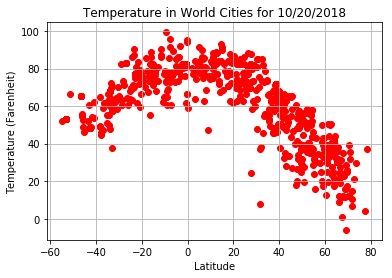

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", c = 'red')

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities for {today}")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

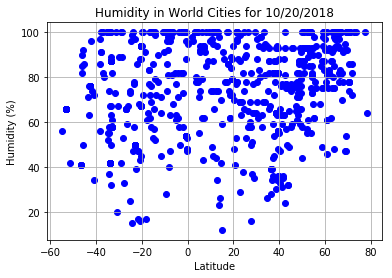

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", c="blue")

# Incorporate the other graph properties
plt.title(f"Humidity in World Cities for {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

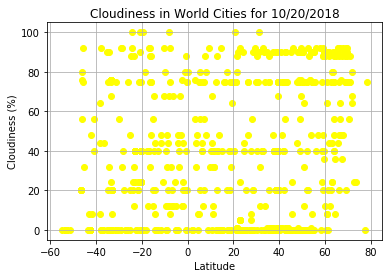

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", c="yellow")

# Incorporate the other graph properties
plt.title(f"Cloudiness in World Cities for {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

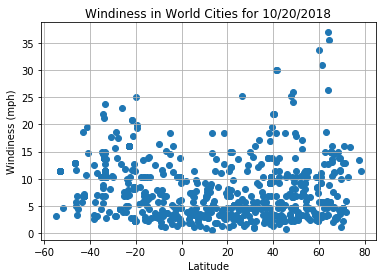

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title(f"Windiness in World Cities for {today}")
plt.ylabel("Windiness (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessInWorldCities.png")

# Show plot
plt.show()